# DataCamp Notes
Author: Ethan Alexander  

---

## Course 4: Data Manipulation with pandas

### Chapter 1: Transforming DataFrames

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

dogs = pd.DataFrame({'name': ['Bella', 'Charlie', 'Lucy', 'Cooper', 'Max', 'Stella', 'Bernie'],
                     'breed': ['Labrador', 'Poodle', 'Chow Chow', 'Schnauzer', 'Labrador', 'Chihuahua', 'St. Bernard'],
                     'color': ['Brown', 'Black', 'Brown', 'Gray', 'Black', 'Tan', 'White'],
                     'height_cm': [56, 43, 46, 49, 59, 18, 77],
                     'weight_kg': [24, 24, 24, 17, 29, 2, 74],
                     'date_of_birth': ['2013-07-01', '2016-09-16', '2014-08-25', '2011-12-11', '2017-01-20', '2015-04-20', '2018-02-27']
                     })
dogs['date_of_birth'] = pd.to_datetime(dogs['date_of_birth'])

with open('data/avoplotto.pkl', 'rb') as file:
    avocados = pickle.load(file)
    
homelessness_data = pd.read_csv('data/homelessness.csv')
sales_data = pd.read_csv('data/sales_subset.csv')
temperature_data = pd.read_csv('data/temperatures.csv')

- `.head()` shows the first 5 rows of a DataFrame.

In [ ]:
dogs.head()

- `.info()` shows column names with data types and whether they have missing values

In [ ]:
dogs.info()

- `.shape` returns tuple (number of rows, number of columns)

In [ ]:
dogs.shape

- `.describe()` shows basic summary statistics for numeric columns

In [ ]:
dogs.describe()

- `.values` returns data values as a 2D NumPy array

In [ ]:
dogs.values

- `.columns` returns column labels
- `.index` returns row labels

In [ ]:
dogs.columns

In [ ]:
dogs.index

- `.sort_values()` sorts DataFrame
- `.sort_values(ascending = False)` puts greater values first
- `.sort_values(["col1", "col2"])` to sort data by multiple columns

In [ ]:
dogs.sort_values("weight_kg")

In [ ]:
dogs.sort_values("weight_kg", ascending=False)

In [ ]:
dogs.sort_values(["weight_kg", "height_cm"], ascending=[True, False])

- `df["col"]` to subset specific column
- `df[["col1", "col2"]]` to subset multiple columns
- `df[condition]` to subset based on condition

In [ ]:
dogs["name"]

In [ ]:
dogs[["breed", "height_cm"]]

In [ ]:
dogs[dogs["height_cm"] > 50]

- `.isin()` to filter on values of a categorical variable

In [ ]:
dogs[dogs["color"].isin(["Black", "Brown"])]

- Create/add a new column

In [ ]:
dogs["height_m"] = dogs["height_cm"] / 100
dogs

Statistics Functions

- `.mean()` to calculate mean
- `.median()` to calculate median
- `.mode()` to calculate mode
- `.min()` to calculate minimum
- `.max()` to calculate maximum
- `.var()` to calculate variance
- `.std()` to calculate standard deviation
- `.sum()` to calculate sum
- `.quantile()` to calculate quantiles
- `.cummsum()` to calculate cumulative sums
- `.cummax()` to calculate cumulative maximums
- `.cummin()` to calculate cumulative minimums
- `.cumprod()` to calculate cumulative products

-  `.agg()` to apply functions

In [ ]:
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

dogs["weight_kg"].agg([iqr, "mean"])

- `.drop_duplicates()` to remove duplicate values

In [ ]:
dogs.drop_duplicates(subset=["name", "breed"])

- `.value_counts()` to calculate number of occurences of each value present
- `.value_counts(normalize = True)` to represent counts as proportions of entire dataset

In [ ]:
dogs["breed"].value_counts(sort = True)

In [ ]:
dogs["breed"].value_counts(normalize = True)

- `.group_by()` to apply functions to various groups

In [ ]:
dogs.groupby("color")["weight_kg"].agg(["min", "max", "sum", "mean"])

In [ ]:
dogs.groupby(["color", "breed"])[["weight_kg", "height_cm"]].mean()

- `.pivot_table()` as alternative to `group_by()`

In [ ]:
dogs.groupby("color")["weight_kg"].mean()
dogs.pivot_table(values = "weight_kg", index = "color")

In [ ]:
dogs.pivot_table(values = "weight_kg", index="color", aggfunc=["mean", "median"])

In [ ]:
dogs.pivot_table(values = "weight_kg", index="color", columns= "breed")

In [ ]:
dogs.pivot_table(values = "weight_kg", index="color", columns= "breed", fill_value=0)

In [ ]:
dogs.pivot_table(values = "weight_kg", index="color", columns= "breed", fill_value=0, margins=True)

- `.set_index()` to set column as index
- `.reset_index()` to reset indices to default
- `.reset_index(drop=True)` deletes column previously used as index
- `.loc[]` to based on named indices
- `.sort_index()` to sort by index

In [ ]:
dogs_ind = dogs.set_index("name")
dogs_ind.loc[["Bella", "Stella"]]

In [ ]:
dogs_ind3 = dogs.set_index(["breed", "color"])
dogs_ind3

In [ ]:
dogs_ind3.loc[["Labrador", "Chihuahua"]]

In [ ]:
dogs_ind3.loc[[("Labrador", "Brown"), ("Chihuahua", "Tan")]]

Slicing with `.loc`

In [ ]:
dogs_srt = dogs.set_index(["breed", "color"]).sort_index()
dogs_srt.loc["Chow Chow":"Poodle"]

In [ ]:
dogs_srt.loc[:, "name":"height_cm" ]

In [ ]:
dogs = dogs.set_index("date_of_birth").sort_index()

In [ ]:
dogs.loc["2014":"2016"]

In [ ]:
dogs.iloc[2:5, 1:4]

In [ ]:
dogs_height_by_breed_vs_color = dogs.pivot_table("height_cm", index="breed", columns="color")
dogs_height_by_breed_vs_color
dogs_height_by_breed_vs_color["Chow Chow":"Schnauzer"]

Calculating summary stats across columns vs across rows
- `axis = "index"`
- `axis = "columns"`

In [ ]:
dogs_height_by_breed_vs_color.mean(axis="index")
# dogs_height_by_breed_vs_color.mean(axis="columns")

histogram

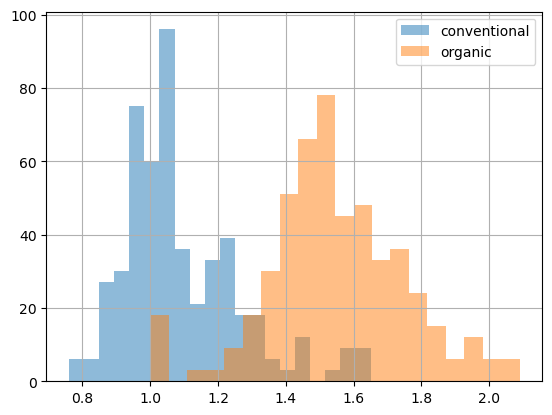

In [71]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

bar plots

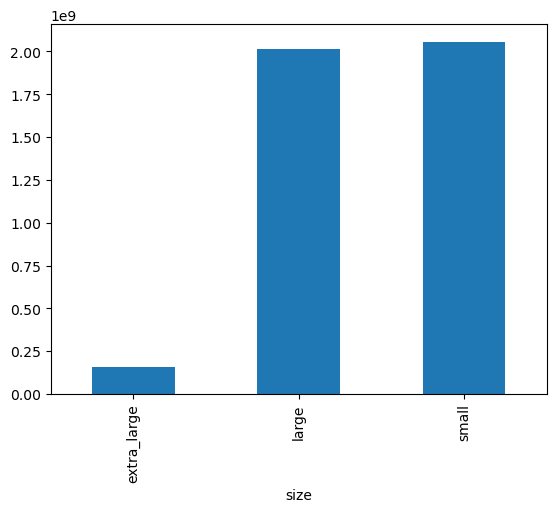

In [67]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

line plots

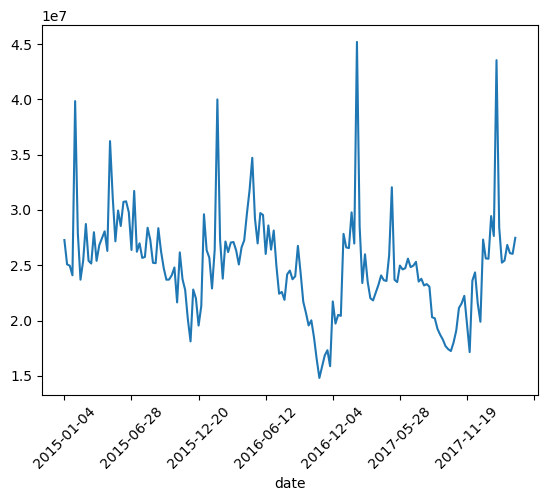

In [ ]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
# rot argument puts x labels on an angle
nb_sold_by_date.plot(kind="line", rot=45)

# Show the plot
plt.show()

scatter plots

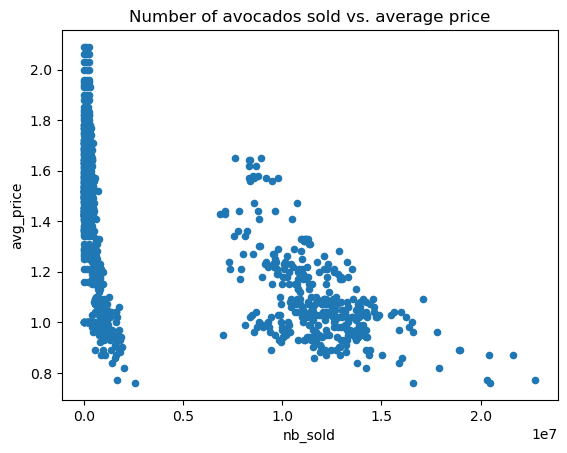

In [70]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

layering plots

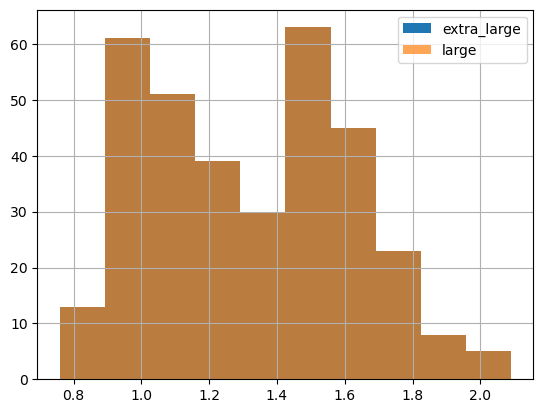

In [ ]:
# bad example bc these plots are identical

# alpha controls translucency (0 = invisible, 1 = opaque)

avocados[avocados["size"]=="extra_large"]["avg_price"].hist(alpha=1)
avocados[avocados["size"]=="large"]["avg_price"].hist(alpha=0.7)
plt.legend(["extra_large", "large"])
plt.show()

missing values

           date          type  year  avg_price         size      nb_sold
52   2016-12-25  conventional  2016       1.00        small   9255125.20
53   2016-12-18  conventional  2016       0.96        small   9394065.91
54   2016-12-11  conventional  2016       0.98        small   9009996.11
55   2016-12-04  conventional  2016       1.00        small  11043350.90
56   2016-11-27  conventional  2016       1.21        small   7891487.94
..          ...           ...   ...        ...          ...          ...
944  2016-01-31       organic  2016       1.43  extra_large      5515.91
945  2016-01-24       organic  2016       1.41  extra_large     12933.97
946  2016-01-17       organic  2016       1.44  extra_large     13106.29
947  2016-01-10       organic  2016       1.35  extra_large      8771.79
948  2016-01-03       organic  2016       1.43  extra_large      7749.40

[312 rows x 6 columns]
      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    Fa

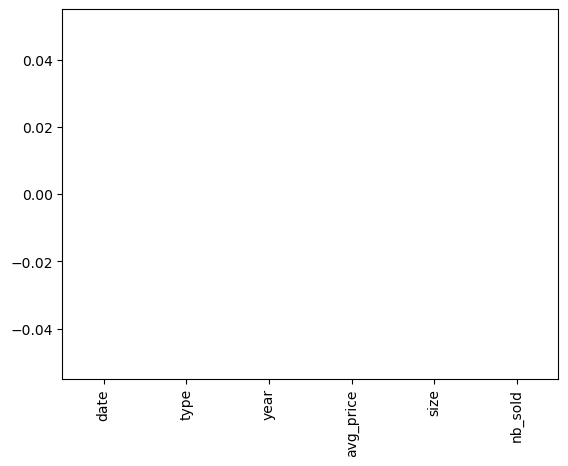

In [ ]:
dogs.isna() # see which values are NA
dogs.isna().any() # see if any columns contain NA
dogs.isna().sum() # number of NAs in each column
dogs.isna().sum().plot(kind="bar") # plot number of missing values
dogs.dropna() # remove rows with any NA values
dogs.fillna(0) # replace all NAs with a value (0 in this case)

creating dataframes

In [82]:
# create DataFrame from a list of dictionaries (constructed row by row)
list_of_dicts = [
    {"name": "Ginger", "breed": "Daschund"},
    {"name": "Scout", "breed": "Dalmatian"}
]
new_dogs = pd.DataFrame(list_of_dicts)
print(new_dogs)

print("")

# create DataFrame from a dictionary of lists (constructed column by column)
dict_of_lists = {
    "name": ["Ginger", "Scout"],
    "breed": ["Daschund", "Dalmatian"]
}
new_dogs = pd.DataFrame(dict_of_lists)
print(new_dogs)

     name      breed
0  Ginger   Daschund
1   Scout  Dalmatian

     name      breed
0  Ginger   Daschund
1   Scout  Dalmatian


reading and writing csvs

In [90]:
# read csv
homelessness = pd.read_csv("data/homelessness.csv", index_col=0)
print(homelessness)

# write csv
homelessness.to_csv("data/homelessnessTheRemix.csv")

                region                 state  individuals  family_members  \
0   East South Central               Alabama       2570.0           864.0   
1              Pacific                Alaska       1434.0           582.0   
2             Mountain               Arizona       7259.0          2606.0   
3   West South Central              Arkansas       2280.0           432.0   
4              Pacific            California     109008.0         20964.0   
5             Mountain              Colorado       7607.0          3250.0   
6          New England           Connecticut       2280.0          1696.0   
7       South Atlantic              Delaware        708.0           374.0   
8       South Atlantic  District of Columbia       3770.0          3134.0   
9       South Atlantic               Florida      21443.0          9587.0   
10      South Atlantic               Georgia       6943.0          2556.0   
11             Pacific                Hawaii       4131.0          2399.0   

inner join - returns rows that have matching values in both tables

In [100]:
wards = pickle.load(open("data/ward.p", "rb"))
census = pickle.load(open("data/census.p", "rb"))

wards_census = wards.merge(census, on="ward", suffixes=("_ward", "_cen"))
print(wards_census.columns)

Index(['ward', 'alderman', 'address_ward', 'zip_ward', 'pop_2000', 'pop_2010',
       'change', 'address_cen', 'zip_cen'],
      dtype='object')


- one-to-one: every row in left table is related to exactly one row in the right table
- one-to-many: every row in left table is related to one or more rows in the right table

In [108]:
licenses = pickle.load(open("data/licenses.p", "rb"))
# syntax for one-to-many is same as one-to-one
ward_licenses = wards.merge(licenses, on="ward", suffixes=("_ward", "_lic"))
print(ward_licenses.head())
print(wards.shape)
print(ward_licenses.shape)

  ward            alderman               address_ward zip_ward account  aid  \
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   12024  NaN   
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14446  743   
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14624  775   
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14987  NaN   
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   15642  814   

               business              address_lic zip_lic  
0   DIGILOG ELECTRONICS       1038 N ASHLAND AVE   60622  
1      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST   60622  
2  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE   60647  
3    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST   60622  
4          Beat Kitchen  2000-2100 W DIVISION ST   60622  
(50, 4)
(10000, 9)
